In [1]:
!pip install opendatasets

**Загрузка датасета и импорт библиотек**

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

od.download("https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: daniillosev
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset


100%|██████████| 7.43k/7.43k [00:00<00:00, 5.90MB/s]

In [3]:
df = pd.read_csv("/content/body-fat-prediction-dataset/bodyfat.csv")

**Анализ данных**

In [ ]:
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


В данном датасете хранится информация о параметрах тела 252 человек.  А именно:
*   Средняя плотность;
*   Процент жира;
*   Возраст;
*   Рост и вес;
*   Размеры шеи, груди, живота, бедра, колена, лодыжки, бицепса, предплечья, запястья;





Далее необходимо проверить наличие пропусков и выбросов данных.

Проверка данных на выбросы:

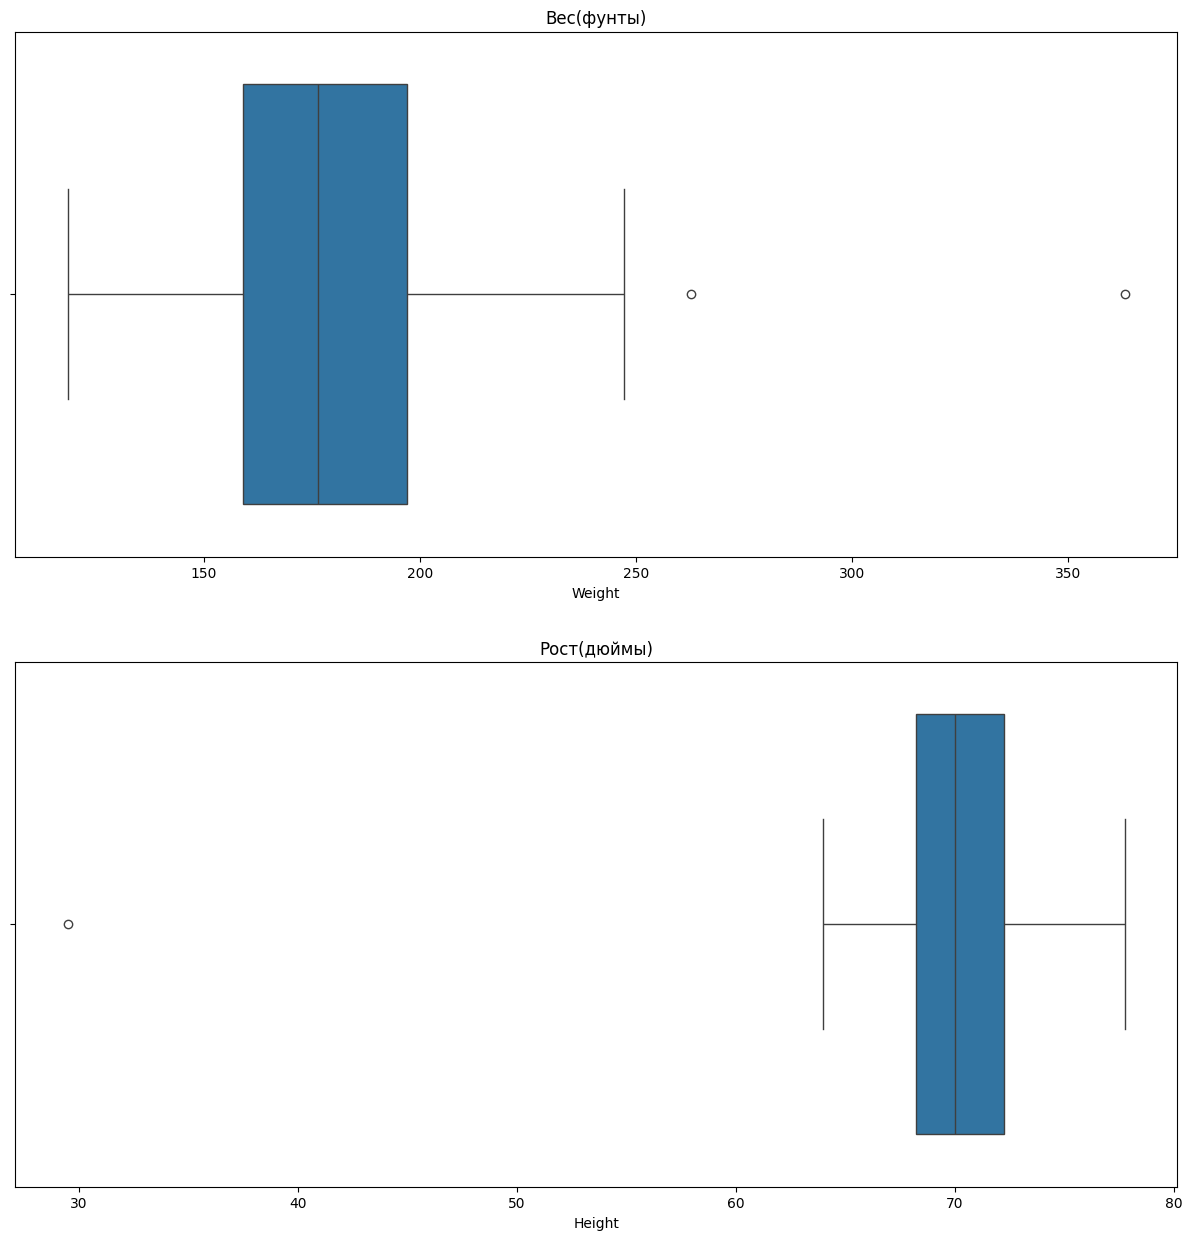

In [ ]:
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(15)
fig.set_figheight(15)
axes[0].set_title('Вес(фунты)')
sns.boxplot(data = df, x = "Weight", ax = axes[0], orient = 'h')
axes[1].set_title('Рост(дюймы)')
sns.boxplot(data = df, x = "Height", ax = axes[1], orient = 'h')
plt.show()

**Вывод:** По графикам можно увидеть, что есть незначительные выбросы, поэтому рекомендуется использовать масштабирование данных

Проверка данных на корреляцию:



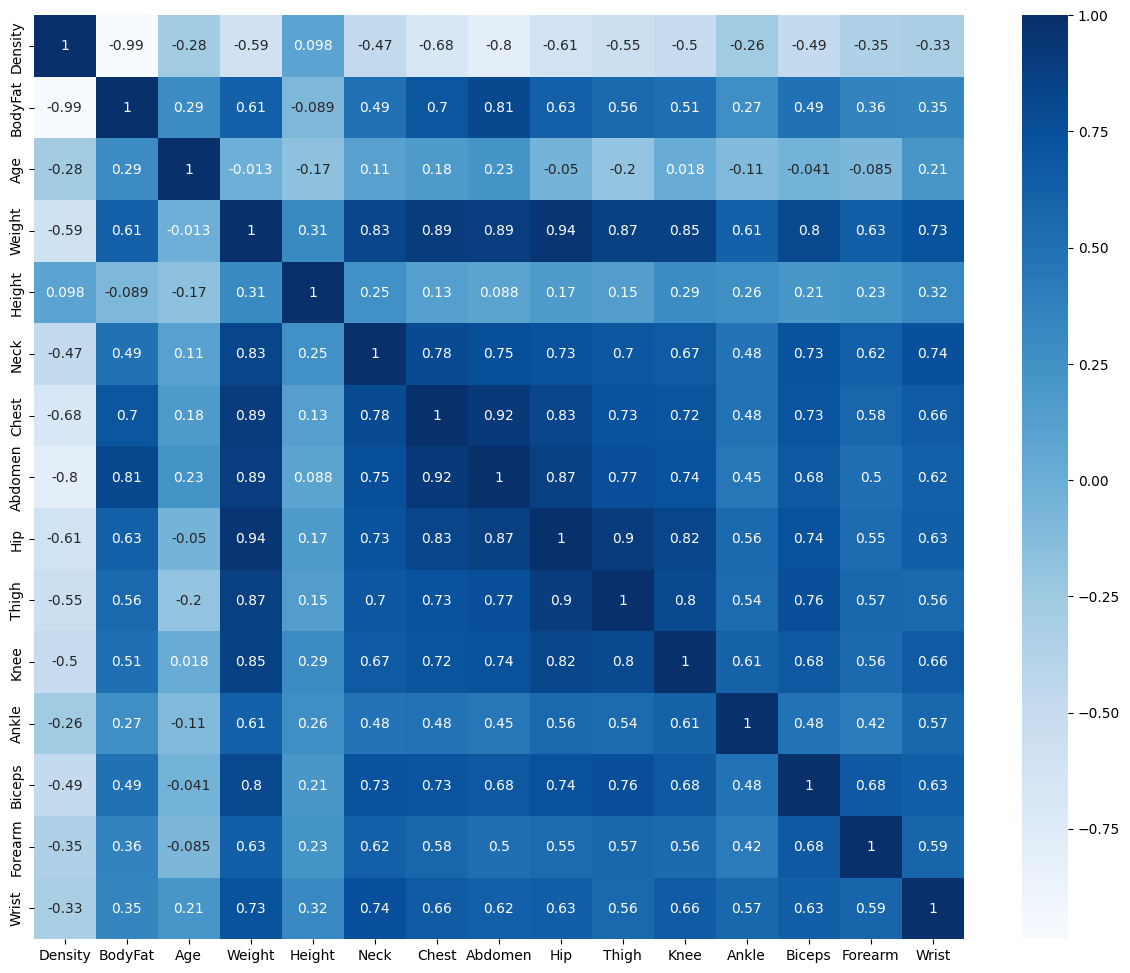

In [ ]:
plt.figure(figsize=(15,12))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, xticklabels=df.corr(numeric_only=True).columns, yticklabels=df.corr(numeric_only=True).columns, cmap='Blues', center=0, annot=True)
plt.show()

Вывод: Все данные коррелируют друг с другом.

Проверка данных на наличие пропусков.

In [ ]:
df.isnull().sum()

,0
Density,0
BodyFat,0
Age,0
Weight,0
Height,0
Neck,0
Chest,0
Abdomen,0
Hip,0
Thigh,0


**Вывод:** в датасете нет пропусков. Заполнение не требуется.

**Предобработка данных**




Разделение данных на признаки и целевую переменную:

In [ ]:
X = df.drop(columns = ['BodyFat'])
Y = df['BodyFat']
columns = X.columns

Нормализация данных:

In [ ]:
mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns = columns)

Стандартизация данных:

In [ ]:
std = StandardScaler()
X_std = std.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = columns)

Разделение данных на обучающую и тестовую выборку:

In [ ]:
#X = X_norm
#X = X_std
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

**Обучение модели**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

Предсказание результата:

In [ ]:
Y_pred = lin_reg.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))
print('R2 score:', r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.430528199522681
Mean Squared Error: 0.29867524886188224
R2 score: 0.995481775539947


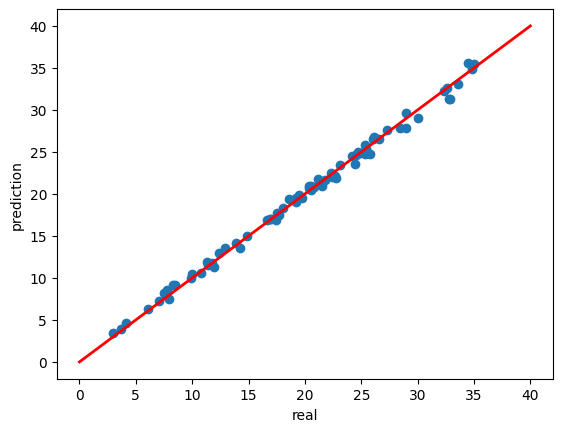

In [ ]:
plt.scatter(Y_test, Y_pred)
x = np.linspace(0, 40, 250)
y = x
plt.plot(x, y, color='red', linewidth=2);
plt.xlabel("real")
plt.ylabel("prediction")
plt.show()

**Итог**

Без масштабирования:
*   MAE: 0.52
*   MSE: 0.65
*   R2: 0.99

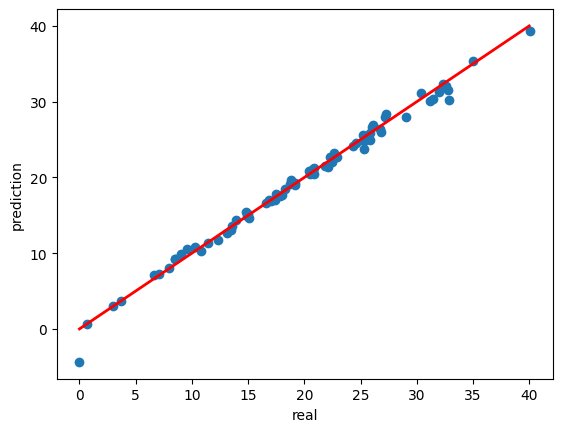

Нормализация:
*   MAE: 0.43
*   MSE: 0.3
*   R2: 0.99

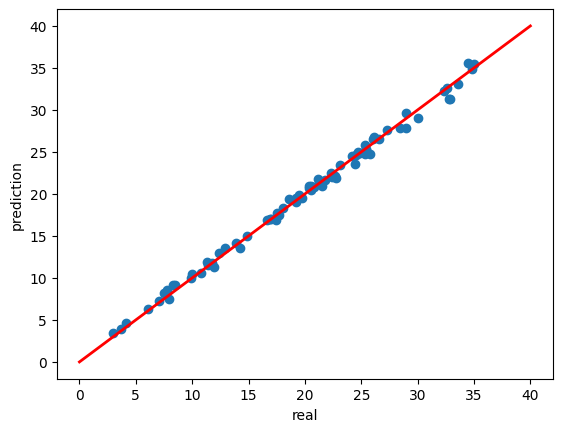

Стандартизация:
*   MAE: 0.7
*   MSE: 0.8
*   R2: 0.99

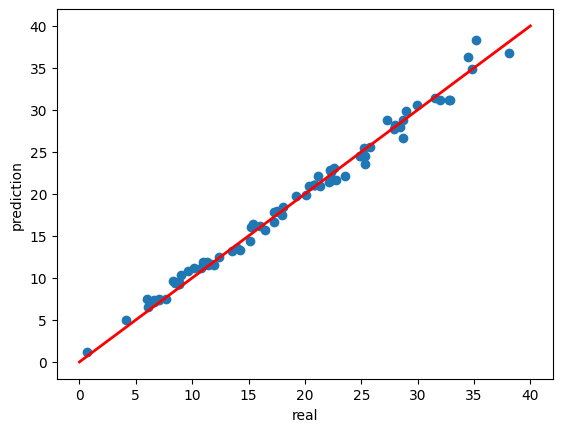